In [1]:
#Saved the dataset to a repo and using wget to avoid manual uoload
!wget   https://github.com/rahul23aug/Datascience_Projects/raw/master/Dataset.xlsx

--2021-10-24 09:19:43--  https://github.com/rahul23aug/Datascience_Projects/raw/master/Dataset.xlsx
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rahul23aug/Datascience_Projects/master/Dataset.xlsx [following]
--2021-10-24 09:19:43--  https://raw.githubusercontent.com/rahul23aug/Datascience_Projects/master/Dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108796 (106K) [application/octet-stream]
Saving to: ‘Dataset.xlsx.1’

Dataset.xlsx.1      100%[===================>] 106.25K  --.-KB/s    in 0.02s   

2021-10-24 09:19:43 (4.20 MB/s) - ‘Dataset.xlsx.1’ saved [108796/108796]



In [2]:
#Import necessary librariey
import numpy as np, pandas as pd, matplotlib.pyplot as plt,seaborn as sns
#Supress warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
sns.set()

In [3]:
#Read xlsx to dataframe
price_df = pd.read_excel('Dataset.xlsx')
metric_df = pd.read_excel('Dataset.xlsx', sheet_name=1)

In [4]:
price_df

,ticker_exchange,date,price
0,AAPL-USA,2021-02-28,121.2600
1,AAPL-USA,2021-03-31,122.1500
2,AAPL-USA,2021-05-31,124.6100
3,AAPL-USA,2021-01-31,131.9600
4,AAPL-USA,2013-01-31,16.2675
...,...,...,...
1077,V-USA,2013-01-31,39.4775
1078,V-USA,2012-12-31,37.8950
1079,V-USA,2013-05-31,44.5350
1080,V-USA,2018-12-31,131.9400


In [5]:
metric_df

,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm
0,AAPL-USA,2021-02-28,89491.2000,338848.250,99831.0600,0.161523,134686.480
1,AAPL-USA,2021-03-31,89844.3700,340721.000,100759.1800,0.161685,135312.340
2,AAPL-USA,2021-05-31,100966.9900,362602.200,111895.0700,0.154499,147911.340
3,AAPL-USA,2021-01-31,88695.9000,335770.060,99486.6600,0.160802,133558.270
4,AAPL-USA,2013-01-31,58193.3550,190675.530,64139.4140,NaN,74128.016
...,...,...,...,...,...,...,...
1077,V-USA,2013-01-31,7354.5510,11993.755,7716.7640,NaN,14670.228
1078,V-USA,2012-12-31,7262.7583,11874.104,7631.5327,NaN,14539.194
1079,V-USA,2013-05-31,7766.8880,12572.116,8178.6387,NaN,NaN
1080,V-USA,2018-12-31,15992.8990,23506.838,16632.3730,0.202647,NaN


In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ticker_exchange  1082 non-null   object        
 1   date             1082 non-null   datetime64[ns]
 2   price            1082 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.5+ KB


In [7]:
price_df.describe()

,price
count,1082.000000
mean,26838.978466
std,79249.146491
min,3.938000
25%,41.299250
50%,106.170000
75%,592.994150
max,436000.000000


In [8]:
metric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ticker_exchange  1082 non-null   object        
 1   date             1082 non-null   datetime64[ns]
 2   ebit_ntm         1043 non-null   float64       
 3   sales_ntm        1070 non-null   float64       
 4   ebitda_ntm       987 non-null    float64       
 5   tax_rate         863 non-null    float64       
 6   gross_inc_ntm    909 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 59.3+ KB


In [9]:
# --!-- Eda
dataset = pd.merge(price_df, metric_df, on=['ticker_exchange','date'], how='inner')
price = dataset.pop('price')
dataset['price'] = price
dataset['date'] = pd.to_datetime(dataset['date'],dayfirst=True)
dataset.sort_values(['ticker_exchange', 'date'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
dataset.reset_index(inplace=True)
dataset.drop('index', inplace=True, axis = 1)
dataset

,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm,price
0,AAPL-USA,2011-07-31,38899.010,128506.430,41356.785,NaN,50920.195,13.945715
1,AAPL-USA,2011-08-31,39515.380,130629.734,42115.773,NaN,52126.242,13.743929
2,AAPL-USA,2011-09-30,40703.860,133804.270,43215.496,NaN,53542.715,13.618572
3,AAPL-USA,2011-10-31,43460.535,140415.230,46408.492,NaN,56414.140,14.456430
4,AAPL-USA,2011-11-30,44102.582,142296.020,47250.223,NaN,57207.902,13.650001
...,...,...,...,...,...,...,...,...
1077,V-USA,2021-03-31,17017.652,25413.336,17785.611,0.188543,NaN,211.730000
1078,V-USA,2021-04-30,17524.865,26196.273,18296.300,0.186942,NaN,233.560000
1079,V-USA,2021-05-31,17836.514,26597.010,18621.297,0.187259,NaN,227.300000
1080,V-USA,2021-06-30,18224.268,27061.113,19032.652,0.187777,24511.076,233.820000


In [10]:
null_cols = dataset.isna().sum()
print(null_cols)
null_cols = list(null_cols[null_cols>0].index)
null_cols

ticker_exchange      0
date                 0
ebit_ntm            39
sales_ntm           12
ebitda_ntm          95
tax_rate           219
gross_inc_ntm      173
price                0
dtype: int64


['ebit_ntm', 'sales_ntm', 'ebitda_ntm', 'tax_rate', 'gross_inc_ntm']

use interpolation to fill NA's

In [11]:
# interpolate using groupby so data from different companies is grouped and also previously sorted in asc order of dates 
temp = dataset.groupby(by = 'ticker_exchange', axis = 0)
keys = list(temp.groups.keys())
for key in keys:
  dataset.iloc[temp.get_group(key).index] = temp.get_group(key).interpolate(method='linear',limit_direction='both')
dataset['gross_margin_ntm'] = dataset['gross_inc_ntm'] / dataset['sales_ntm']

In [12]:
#dataset.dropna(axis=0, inplace=True)
dataset

,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm,price,gross_margin_ntm
0,AAPL-USA,2011-07-31,38899.010,128506.430,41356.785,0.254056,50920.195000,13.945715,0.396246
1,AAPL-USA,2011-08-31,39515.380,130629.734,42115.773,0.254056,52126.242000,13.743929,0.399038
2,AAPL-USA,2011-09-30,40703.860,133804.270,43215.496,0.254056,53542.715000,13.618572,0.400157
3,AAPL-USA,2011-10-31,43460.535,140415.230,46408.492,0.254056,56414.140000,14.456430,0.401767
4,AAPL-USA,2011-11-30,44102.582,142296.020,47250.223,0.254056,57207.902000,13.650001,0.402034
...,...,...,...,...,...,...,...,...,...
1077,V-USA,2021-03-31,17017.652,25413.336,17785.611,0.188543,24183.182923,211.730000,0.951594
1078,V-USA,2021-04-30,17524.865,26196.273,18296.300,0.186942,24292.480615,233.560000,0.927326
1079,V-USA,2021-05-31,17836.514,26597.010,18621.297,0.187259,24401.778308,227.300000,0.917463
1080,V-USA,2021-06-30,18224.268,27061.113,19032.652,0.187777,24511.076000,233.820000,0.905767


In [13]:
dataset[dataset['gross_inc_ntm'].isna()]

,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm,price,gross_margin_ntm
242,BABAF-USA,2021-05-31,NaN,NaN,NaN,NaN,NaN,26.805,NaN
243,BABAF-USA,2021-06-30,NaN,NaN,NaN,NaN,NaN,28.500,NaN
244,BABAF-USA,2021-07-15,NaN,NaN,NaN,NaN,NaN,27.000,NaN
245,BRK.A-USA,2011-07-31,12633.858,111916.41,39009.610,0.319879,NaN,111500.000,NaN
246,BRK.A-USA,2011-08-31,12633.858,109864.00,39009.610,0.319879,NaN,109769.000,NaN
...,...,...,...,...,...,...,...,...,...
361,BRK.A-USA,2021-03-31,33407.800,274899.50,45648.430,0.142861,NaN,385702.000,NaN
362,BRK.A-USA,2021-04-30,33632.656,276385.60,45934.105,0.142276,NaN,412500.000,NaN
363,BRK.A-USA,2021-05-31,33464.703,281355.13,44671.770,0.150427,NaN,436000.000,NaN
364,BRK.A-USA,2021-06-30,33704.137,282581.60,44971.867,0.147340,NaN,418601.000,NaN


In [14]:
temp = dataset.groupby(by = 'ticker_exchange', axis = 0)
temp.groups.keys()
temp.get_group('BABAF-USA').isna().all()
#BABAF-USA has Nan on all metric data 

ticker_exchange     False
date                False
ebit_ntm             True
sales_ntm            True
ebitda_ntm           True
tax_rate             True
gross_inc_ntm        True
price               False
gross_margin_ntm     True
dtype: bool

In [15]:
temp.get_group('BRK.A-USA')

,ticker_exchange,date,ebit_ntm,sales_ntm,ebitda_ntm,tax_rate,gross_inc_ntm,price,gross_margin_ntm
245,BRK.A-USA,2011-07-31,12633.858,111916.410,39009.610,0.319879,NaN,111500.0,NaN
246,BRK.A-USA,2011-08-31,12633.858,109864.000,39009.610,0.319879,NaN,109769.0,NaN
247,BRK.A-USA,2011-09-30,12633.858,105509.330,39009.610,0.319879,NaN,106800.0,NaN
248,BRK.A-USA,2011-10-31,12633.858,100815.500,39009.610,0.319879,NaN,116950.0,NaN
249,BRK.A-USA,2011-11-30,12633.858,97167.664,39009.610,0.319879,NaN,118500.0,NaN
...,...,...,...,...,...,...,...,...,...
361,BRK.A-USA,2021-03-31,33407.800,274899.500,45648.430,0.142861,NaN,385702.0,NaN
362,BRK.A-USA,2021-04-30,33632.656,276385.600,45934.105,0.142276,NaN,412500.0,NaN
363,BRK.A-USA,2021-05-31,33464.703,281355.130,44671.770,0.150427,NaN,436000.0,NaN
364,BRK.A-USA,2021-06-30,33704.137,282581.600,44971.867,0.147340,NaN,418601.0,NaN


In [16]:
dataset['date'].min()

Timestamp('2011-07-31 00:00:00')

Combining it all into a Function below

#Solution #1 Function to create rolling correlation

In [17]:
#1 Function
try:
  dataset = pd.merge(price_df, metric_df, on=['ticker_exchange','date'], how='inner')
except Exception as e:
  print("Error in merge!\n",e)

def get_rolling_corr(dataset, roll_months=0) -> pd.DataFrame:
  '''This function requires a set of columns to produce the right output, the two arguments here are data and window'''
  #assert dataset.columns == ['ticker_exchange','date','ebit_ntm','sales_ntm','ebitda_ntm','tax_rate','gross_inc_ntm','price'], 'Expected Columns Not Found'
  assert roll_months >=2, 'roll_months must be > or = 2'
  dataset['date'] = pd.to_datetime(dataset['date'],dayfirst=True)
  dataset.sort_values(['ticker_exchange', 'date'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
  dataset.reset_index(inplace=True)
  dataset.drop('index', inplace=True, axis = 1)
  # interpolate using groupby so data from different companies is grouped and also previously sorted in asc order of dates 
  temp = dataset.groupby(by = 'ticker_exchange', axis = 0)
  keys = list(temp.groups.keys())
  # fill original dataframe with interpolated values
  for key in keys:
    dataset.iloc[temp.get_group(key).index] = temp.get_group(key).interpolate(method='linear',limit_direction='both')
  # create gross_margin_ntm
  dataset['gross_margin_ntm'] = dataset['gross_inc_ntm'] / dataset['sales_ntm']
  # keep a track of start date to calculate months since that date
  # months column will be used to match months to calculate rolling corr
  min_date = dataset['date'].min()
  # keep a check of the lowest date in the dataset the following calculations avoid rounding errors
  dataset['month']= (dataset['date'].dt.year - min_date.year)*12 + (dataset['date'].dt.month - min_date.month)
  price = dataset.pop('price')
  dataset['price'] = price
  dataset.dropna(axis=0, inplace=True)
  # update groups 
  temp = dataset.groupby(by = 'ticker_exchange', axis = 0)
  # group length vs roll validation
  if len(keys)!= len(list(temp.groups.keys())):
    print('[!] NaN values found after interpolation were dropped causing some keys as a whole to be dropped')
    print('---------------------------- Dropped Keys------------------------------------------------')
    print(list(set(keys)- set(temp.groups.keys())))
    print('-----------------------------------------------------------------------------------------')
    print('Window = '+str(roll_months)+ ' month(s)')
  # New updated group
  df = dataset.groupby(by = 'ticker_exchange', axis = 0)
  keys = df.groups.keys()
  roll_cols = [i for i in dataset.columns if i not in ['ticker_exchange','month','price','date']]
  corr_df = pd.DataFrame([])
  p =[]
  for i in keys:
    # temp now acts as a group container
    temp = df.get_group(i)
    if len(temp) <= roll_months:
      print('Warning! : {} Has data points {} <= window {}'.format(i,len(temp),roll_months))
    temp_df = temp['price'].rolling(roll_months).corr(temp[roll_cols])
    temp_df.insert(0, 'ticker_exchange', temp['ticker_exchange'], allow_duplicates=False)
    corr_df = pd.concat([corr_df,temp_df],axis=0)
  print('-----------------------------------------------------------------------------------------')
  corr_df = corr_df.T
  return corr_df

get_rolling_corr(dataset, 3)

[!] NaN values found after interpolation were dropped causing some keys as a whole to be dropped
---------------------------- Dropped Keys------------------------------------------------
['BABAF-USA', 'BRK.A-USA']
-----------------------------------------------------------------------------------------
Window = 3 month(s)
-----------------------------------------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081
ticker_exchange,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,AAPL-USA,...,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA,V-USA
ebit_ntm,NaN,NaN,-0.950771,0.905961,0.369023,0.0838001,0.97203,0.814015,0.891835,0.548013,-0.988449,0.0640387,-0.575337,-0.199366,0.7728,0.805642,0.974332,-0.500544,0.916751,0.977227,-0.484604,-0.619732,-0.490324,-0.655298,-0.586741,-0.848165,0.408664,0.539633,0.998633,0.764523,0.730749,0.956237,0.976646,0.999997,0.973961,0.896692,0.976316,0.867215,0.440477,0.823174,...,0.705446,0.998126,0.983794,0.990327,0.968737,0.984613,-0.0207232,0.0287732,-0.618287,-0.743881,0.972596,0.991529,0.999566,0.599119,0.705996,0.93675,0.999727,-0.689688,-0.996752,0.169866,0.979981,0.836263,-0.49697,0.847011,0.290722,-0.999881,-0.989033,-0.998949,0.694347,0.39877,0.7463,0.399225,0.864383,-0.653171,-0.291046,0.802917,0.898246,0.784596,0.0978076,0.922788
sales_ntm,NaN,NaN,-0.969371,0.894849,0.337491,0.0406414,0.976258,0.829882,0.90019,0.69642,-0.999633,0.058355,0.243111,0.650354,0.802726,-0.702264,-0.895287,-0.732265,0.891475,0.937622,-0.981064,-0.595621,-0.441323,-0.738539,-0.698281,-0.879492,0.382596,0.846354,0.97757,0.861517,0.838694,0.99184,0.980906,0.994037,0.996579,0.951718,0.979008,0.887312,0.449977,0.810828,...,0.763184,0.995832,0.980992,0.996486,0.949172,0.982451,-0.695545,-0.609706,-0.60015,-0.720554,0.949822,0.985541,0.998149,0.680355,0.737204,0.90237,0.999731,-0.658912,-0.338355,0.981831,0.983175,0.950345,-0.296293,0.837046,0.272793,-0.968598,-0.87752,-0.973997,0.836589,0.363165,0.684719,0.574865,0.910658,-0.647613,-0.235811,0.803146,0.920752,0.813025,0.0774219,0.925167
ebitda_ntm,NaN,NaN,-0.971452,0.92555,0.350076,0.106279,0.976522,0.808129,0.901486,0.47037,-0.983246,0.175249,-0.292717,0.108756,0.835581,0.815142,0.99598,-0.907967,0.89521,0.969772,-0.718775,-0.611712,-0.473336,-0.719433,-0.808302,-0.505341,0.503981,0.730513,0.973463,0.729258,-0.00433525,0.964106,0.938182,0.989334,0.978621,0.88368,0.995786,0.872386,0.429846,0.776115,...,0.756829,0.998986,0.994482,0.994649,0.963547,0.986395,0.629594,0.78802,-0.65522,-0.702344,0.953468,0.97918,0.999933,0.641697,0.716442,0.928352,0.999031,-0.620845,-0.911521,0.579237,0.970626,0.866374,-0.445901,0.842979,0.341982,-0.99563,-0.987719,-0.997813,0.689978,0.33992,0.691971,0.424262,0.868092,-0.70493,-0.320313,0.796998,0.889732,0.778715,0.102649,0.917075
tax_rate,NaN,NaN,-inf,NaN,NaN,NaN,NaN,inf,NaN,-inf,NaN,NaN,NaN,-inf,inf,inf,inf,inf,inf,inf,inf,NaN,-inf,-inf,-inf,-0.790929,0.0271377,0.438347,0.990505,0.666367,0.663081,0.334535,0.067923,-0.566034,-0.748393,-0.852261,-0.986474,-0.7938,0.203054,0.872956,...,-0.688908,-0.945169,-0.958801,-0.960435,-0.680192,0.951737,0.966883,0.932374,0.835269,0.743168,-0.0669965,0.99143,-0.784822,-0.97709,-0.161298,-0.74416,-0.892186,-0.71994,-0.334154,-0.863562,0.959372,-0.962527,-0.235811,0.802109,-0.226185,-0.821336,0.813845,-0.967777,0.63708,0.418386,-0.942201,-0.298658,-0.916272,0.952975,0.623955,-0.5085,-0.859843,-0.99555,0.173072,0.991318
gross_inc_ntm,NaN,NaN,-0.983778,0.891891,0.342321,0.0574537,0.972379,0.819887,0.901292,0.601166,-0.990876,0.155522,-0.220627,0.0543648,0.773729,0.718388,0.938647,-0.818304,0.89558,0.975797,-0.856702,-0.60029

#Solution #2

------------------------------------------------------------------
------------------------------------------------------------------




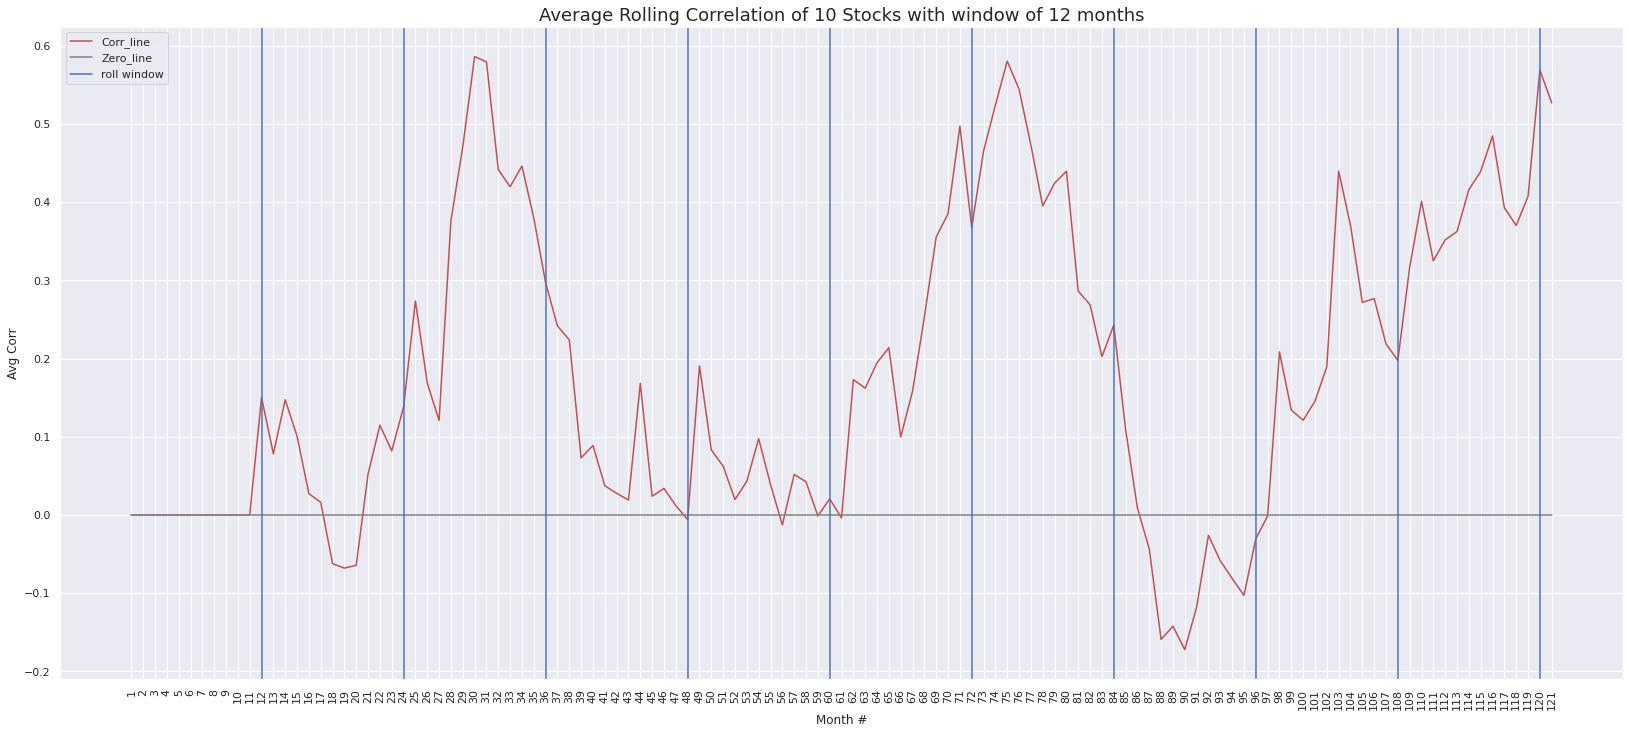

In [18]:
def plot_avg_rolling_corr(price_df,roll=12):
  assert (list(price_df.columns) == ['ticker_exchange', 'date', 'price']) or (list(price_df.columns) == ['ticker_exchange', 'date', 'price', 'month']), "Did not find required columns to proceed"
  '''Plots rolling corr of stocks in a single line while ignoring auto corr'''
  print('------------------------------------------------------------------')
  print('Warning: NaN filled using interpolation method, starting values are always backfilled')
  print('------------------------------------------------------------------\n\n')
  price_df.sort_values(['ticker_exchange', 'date'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False, key=None)
  price_df.reset_index(inplace=True)
  price_df.drop('index', inplace=True, axis = 1)
  min_date = price_df['date'].min()
  price_df['month']= (price_df['date'].dt.year - min_date.year)*12 + (price_df['date'].dt.month - min_date.month)
  temp = price_df.groupby('ticker_exchange', axis=0)
  df = pd.DataFrame([])
  #concatenating price to axis =1
  for key in temp.groups.keys():
    temp_df = temp.get_group(key)
    temp_df.index = temp_df.month
    temp_df.drop('month',axis=1,inplace=True)
    df = pd.concat([df,temp_df['price']],axis=1)
  df.columns = [i + '_price' for i in temp.groups.keys()]
  #filling na using bi directional interpolation
  df.interpolate(method='linear',limit_direction='both',inplace=True) 
  temp_df = df.rolling(roll).corr(pairwise=True)  #Creates a multi-index df which can be iterated using df.loc
  min_ = min(temp_df.index)[0]
  max_ = max(temp_df.index)[0]
  #clip +inf and -inf to 2 and -2 respectively
  temp_df.replace(np.inf,2,inplace=True)
  temp_df.replace(np.NINF,-2,inplace=True)
  #pad Nas with 0 for graphing 
  temp_df.fillna(0,inplace=True)
  #create arrays to store avg rolling corr
  corr=[]
  month=[]
  for i in range(min_,max_+1):
    #replace autocorr or diagonals with zero
    np.fill_diagonal(temp_df.loc[i].values,0)
    _,n = temp_df.shape
    #while calculating mean ignore auto-corr so cols = cols-1
    n-=1  
    corr.append((temp_df.loc[i].sum(axis=1)/n).mean())
    month.append(i+1)
  plt.figure(figsize=(28,12))
  sns.set_style('darkgrid')
  sns.lineplot(month,corr, color ='r',label='Corr_line')
  sns.lineplot(month, np.zeros_like(np.array(month)), color='gray',label='Zero_line')
  plt.title('Average Rolling Correlation of '+ str(n+1)+" Stocks with window of {} months".format(roll),fontsize=18)
  plt.xlabel("Month #",fontsize=12)
  plt.xticks(month, rotation=90)
  plt.ylabel("Avg Corr",fontsize=12)
  #create yearly vertical lines 
  plt.axvline(x=roll, label='roll window')
  f= int(max(month)/12)
  for i in range(2,f+1):
    plt.axvline(x=12*i)
  plt.legend()
  plt.show()
  return None

plot_avg_rolling_corr(price_df)